Let's get started working with spatial data! In this notebook you'll learn how to open and plot GeoDataFrames as shapefiles (.shp) in `Python` using the `Geopandas` library. We'll also demonstrate how to make an interactive map using `Folium`.

You can read more about working with **Geopandas** here:
> * [Earth Data Science Textbook](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/)
> * [Geopandas Documentation](https://geopandas.org/en/stable/getting_started/introduction.html)

Read more about **Folium** here: 
> * [Earth Data Science Textbook](https://www.earthdatascience.org/tutorials/introduction-to-leaflet-animated-maps/) 
> * [Folium Documentation](https://python-visualization.github.io/folium/latest/getting_started.html)

From Earth Data Science textbook: 

![](https://www.earthdatascience.org/images/courses/earth-analytics/spatial-data/points-lines-polygons-vector-data-types.png)

In [1]:
# Import Python libraries
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

In [2]:
# Download Colombia boundary
colombia_boundary_url = ("https://maps.princeton.edu/download/file/tufts-colombia-municipalities-11-shapefile.zip")

# Open Colombia boundary .shp with geopandas

col_bound_gdf = gpd.read_file(colombia_boundary_url)

In [34]:
col_bound_gdf

,ID_ESPACIA,AREA_OFICI,ENTIDAD_TE,NOM_DEPART,NOM_MUNICI,COD_DEPTO,geometry
0,23189,637.49,Cabecera Municipal,CÓRDOBA,CIÉNAGA DE ORO,23,"POLYGON ((-75.71080 8.98249, -75.71119 8.98358..."
1,23570,795.00,Cabecera Municipal,CÓRDOBA,PUEBLO NUEVO,23,"POLYGON ((-75.25133 8.32489, -75.25144 8.32489..."
2,23068,1932.62,Cabecera Municipal,CÓRDOBA,AYAPEL,23,"POLYGON ((-75.18418 8.39828, -75.18352 8.39893..."
3,23580,1650.73,Cabecera Municipal,CÓRDOBA,PUERTO LIBERTADOR,23,"POLYGON ((-75.51257 7.94787, -75.51315 7.94683..."
4,23686,472.57,Cabecera Municipal,CÓRDOBA,SAN PELAYO,23,"POLYGON ((-75.71080 8.98249, -75.71024 8.98264..."
...,...,...,...,...,...,...,...
1123,23675,335.03,Cabecera Municipal,CÓRDOBA,SAN BERNARDO DEL VIENTO,23,"POLYGON ((-75.86320 9.42472, -75.86318 9.42231..."
1124,23672,210.75,Cabecera Municipal,CÓRDOBA,SAN ANTERO,23,"POLYGON ((-75.86320 9.42472, -75.86297 9.42476..."
1125,23168,320.42,Cabecera Municipal,CÓRDOBA,CHIMÁ,23,"POLYGON ((-75.71080 8.98249, -75.71213 8.98212..."
1126,23670,212.44,Cabecera Municipal,CÓRDOBA,SAN ANDRÉS DE SOTAVENTO,23,"POLYGON ((-75.57457 9.02304, -75.57458 9.02421..."


## **Department Boundaries**

In [3]:
# Colombia Admin boundaries
dept_url = ("https://stacks.stanford.edu/file/druid:mj028ht5751/data.zip")

# Open data with geopandas
dep_bound_gdf = gpd.read_file(dept_url)

In [35]:
# Explore department boundary data using .info()
dep_bound_gdf.info()

# Look at "NAME_2" column values
dep_bound_gdf['NAME_2']

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1065 entries, 0 to 1064
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID_0       1065 non-null   int64   
 1   ISO        1065 non-null   object  
 2   NAME_0     1065 non-null   object  
 3   ID_1       1065 non-null   int64   
 4   NAME_1     1065 non-null   object  
 5   ID_2       1065 non-null   int64   
 6   NAME_2     1065 non-null   object  
 7   HASC_2     1062 non-null   object  
 8   CCN_2      1065 non-null   int64   
 9   CCA_2      0 non-null      float64 
 10  TYPE_2     1056 non-null   object  
 11  ENGTYPE_2  1056 non-null   object  
 12  NL_NAME_2  0 non-null      float64 
 13  VARNAME_2  87 non-null     object  
 14  geometry   1065 non-null   geometry
dtypes: float64(2), geometry(1), int64(4), object(8)
memory usage: 124.9+ KB


0              El Encanto
1             La Chorrera
2              La Pedrera
3                 Leticia
4           Mirití-Paraná
              ...        
1060         La Primavera
1061       Puerto Carreño
1062    San Jose de Ocune
1063           Santa Rita
1064        Santa Rosalía
Name: NAME_2, Length: 1065, dtype: object

In [36]:
# Select Amazonas municipality
amazonas = col_bound_gdf[col_bound_gdf['NOM_DEPART'] == 'AMAZONAS']
amazonas

,ID_ESPACIA,AREA_OFICI,ENTIDAD_TE,NOM_DEPART,NOM_MUNICI,COD_DEPTO,geometry
33,91530,8410.09,Corregimiento Departamental,AMAZONAS,PUERTO ALEGRÍA (Cor. Departamental),91,"POLYGON ((-74.38851 -0.55351, -74.38102 -0.551..."
34,91263,10690.26,Corregimiento Departamental,AMAZONAS,EL ENCANTO (Cor. Departamental),91,"POLYGON ((-71.77392 -2.17489, -71.77594 -2.176..."
35,91536,13641.05,Corregimiento Departamental,AMAZONAS,PUERTO ARICA (Cor. Departamental),91,"POLYGON ((-71.77392 -2.17489, -71.77593 -2.171..."
36,91798,9137.71,Corregimiento Departamental,AMAZONAS,TARAPACÁ (Cor. Departamental),91,"POLYGON ((-69.71428 -3.00261, -69.71601 -3.002..."
37,91001,6186.26,CAP. DEPTO,AMAZONAS,LETICIA,91,"POLYGON ((-69.71428 -3.00261, -69.88301 -3.940..."
38,91540,1515.58,Cabecera Municipal,AMAZONAS,PUERTO NARIÑO,91,"POLYGON ((-70.33734 -3.20082, -70.33744 -3.211..."
39,91460,16891.79,Corregimiento Departamental,AMAZONAS,MIRITÍ-PARANÁ (Campoamor) (Cor. Departamental),91,"POLYGON ((-71.99610 -0.26831, -71.98758 -0.268..."
40,91430,1506.18,Corregimiento Departamental,AMAZONAS,LA VICTORIA (Pacoa) (Cor. Departamental),91,"POLYGON ((-71.44949 0.02042, -71.44805 0.02046..."
41,91405,12738.75,Corregimiento Departamental,AMAZONAS,LA CHORRERA (Cor. Departamental),91,"POLYGON ((-71.99031 -1.53227, -71.99052 -1.553..."
42,91669,14759.22,Corregimiento Departamental,AMAZONAS,SANTANDER (Araracuara) (Cor. Departamental),91,"POLYGON ((-70.72647 -1.43024, -70.73084 -1.434..."


In [37]:
# Select Puerto Nariño
ptonar = amazonas[amazonas['NOM_MUNICI'] == 'PUERTO NARIÑO']
ptonar

,ID_ESPACIA,AREA_OFICI,ENTIDAD_TE,NOM_DEPART,NOM_MUNICI,COD_DEPTO,geometry
38,91540,1515.58,Cabecera Municipal,AMAZONAS,PUERTO NARIÑO,91,"POLYGON ((-70.33734 -3.20082, -70.33744 -3.211..."


<Axes: >

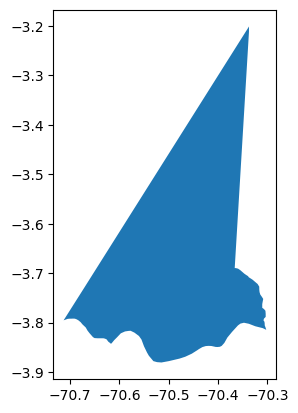

In [38]:
# Plot Puerto Nariño
ptonar.plot()

In [8]:
# Plot the Colombia geodataframe using Matplotlib
#col_bound_gdf.explore()

## **Petroleum & Gas (2013)**

In [9]:
# Oil & Gas (point shapefile)

# Citation: Petroleum and Gas Extraction Sites Colombia 2013. [Shapefile].
# Sistema de Inforrmacion Ambiental de Colombia (SIAC).
# Retrieved from https://maps.princeton.edu/catalog/tufts-colombia-petroleumgasexplotation-sites-13

oil_url = ("https://maps.princeton.edu/download/file/tufts-colombia-petroleumgasexplotation-sites-13-shapefile.zip")

# Open the oil and gas data using geopandas

oil2013_col_gdf = gpd.read_file(oil_url)

oil2013_col_gdf

,CORPORACIO,DEPTO,ESTADO,EXP,FECHA,MUNIC,PROYECTO,REGION,RESOLUCION,SOLICITANT,geometry
0,CORPOAMAZONIA,CAQUETA,SEGUIMIENTO,LAM4353,04/06/2009,SAN JOSE DEL FRAGUA,AREA DE PERFORACION EXPLORATORIA TOPOYACO-TOPO...,AMAZONIA,1035.0,TRAYECTORIA OIL AND GAS SUCURSAL COLOMBIA,POINT (-76.22626 1.14385)
1,CORPOAMAZONIA,CAQUETA,SEGUIMIENTO,LAM4353,04/06/2009,SAN JOSE DEL FRAGUA,AREA DE PERFORACION EXPLORATORIA TOPOYACO-TOPO...,AMAZONIA,1035.0,TRAYECTORIA OIL AND GAS SUCURSAL COLOMBIA,POINT (-76.23612 1.13818)
2,CORPOAMAZONIA,CAQUETA,SEGUIMIENTO,LAM4353,04/06/2009,SAN JOSE DEL FRAGUA,AREA DE PERFORACION EXPLORATORIA TOPOYACO-TOPO...,AMAZONIA,1035.0,TRAYECTORIA OIL AND GAS SUCURSAL COLOMBIA,POINT (-76.22893 1.14162)
3,CORPOCESAR,CESAR,SEGUIMIENTO,LAM4539,21/12/2009,EL PASO,LICENCIA AMBIENTAL GLOBAL PARA EL PROYECTO CAM...,NORTE,2563.0,TEXICAN OIL LTD SUCURSAL COLOMBIA,POINT (-73.68522 9.70236)
4,CORPOCESAR,CESAR,SEGUIMIENTO,LAM4539,21/12/2009,EL PASO,LICENCIA AMBIENTAL GLOBAL PARA EL PROYECTO CAM...,NORTE,2563.0,TEXICAN OIL LTD SUCURSAL COLOMBIA,POINT (-73.67319 9.71454)
...,...,...,...,...,...,...,...,...,...,...,...
941,CAM,HUILA,SEGUIMIENTO,LAM3703,07/06/2007,PALERMO,POZO EXPLORATORIO GUANABANA-2,CENTRO SUR,1007.0,HOCOL S.A.,POINT (-75.38347 2.77870)
942,CAM,HUILA,SEGUIMIENTO,LAM3703,07/06/2007,PALERMO,POZO EXPLORATORIO GUANABANA-1,CENTRO SUR,1007.0,HOCOL S.A.,POINT (-75.38787 2.76720)
943,CORPOBOYACA,BOYACA,SEGUIMIENTO,LAM1994,17/12/2003,PUERTO BOYACA,POZO BALSO-1,CENTRO,1378.0,MANSAROVAR ENERGY COLOMBIA LTD,POINT (-74.53784 6.17697)
944,CORPOBOYACA,BOYACA,SEGUIMIENTO,LAM1994,17/12/2003,PUERTO BOYACA,POZO MORICHE-1,CENTRO,1378.0,MANSAROVAR ENERGY COLOMBIA LTD,POINT (-74.53605 6.19696)


In [39]:
# Print all the entries in the 'SOLICITANT' column using .to_string(index=False)
print(oil2013_col_gdf['SOLICITANT'].to_string(index=False))

         TRAYECTORIA OIL AND GAS SUCURSAL COLOMBIA
         TRAYECTORIA OIL AND GAS SUCURSAL COLOMBIA
         TRAYECTORIA OIL AND GAS SUCURSAL COLOMBIA
                 TEXICAN OIL LTD SUCURSAL COLOMBIA
                 TEXICAN OIL LTD SUCURSAL COLOMBIA
                                      DRUMMOND LTD
                                      DRUMMOND LTD
                                      DRUMMOND LTD
                                      DRUMMOND LTD
                                      DRUMMOND LTD
                                      DRUMMOND LTD
                                      DRUMMOND LTD
                                      DRUMMOND LTD
                                      DRUMMOND LTD
                                      DRUMMOND LTD
                                      DRUMMOND LTD
                                      DRUMMOND LTD
                                      DRUMMOND LTD
                                      DRUMMOND LTD
                               

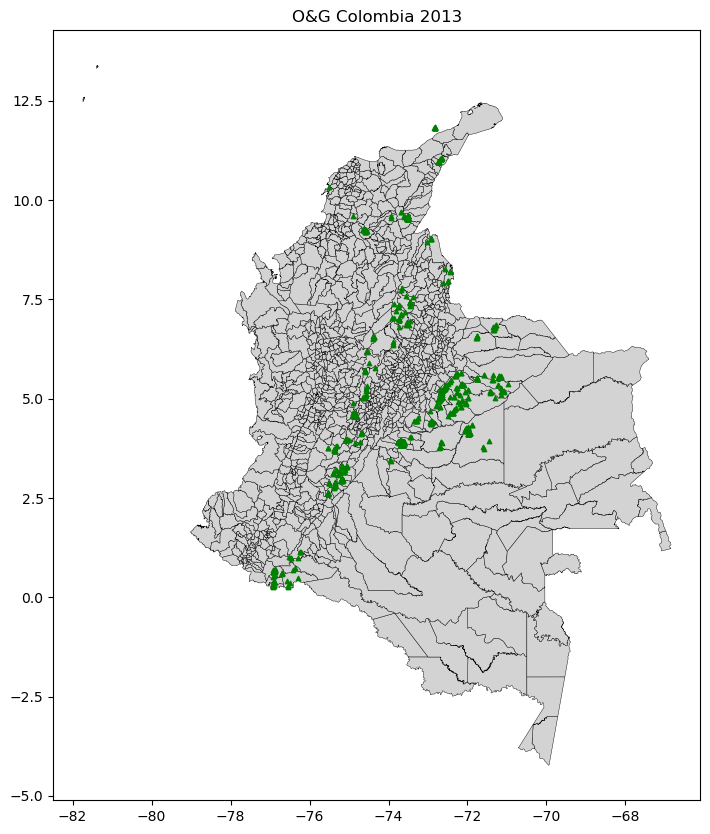

In [11]:
# Plot Oil and Gas (2013) Locations on the Colombia boundary using Matplotlib
fig,ax = plt.subplots(figsize = (20,10))

col_bound_gdf.plot(ax = ax, edgecolor = 'black', color = 'lightgray', linewidth = 0.3)

oil2013_col_gdf.plot (ax = ax, marker = '^', color = 'green', markersize = 10)

plt.title('O&G Colombia 2013')
plt.show()

## **Rivers**

In [12]:
# Open Colombia rivers
rivers_url = ("https://maps.princeton.edu/download/file/tufts-colombia-major-rivers-11-shapefile.zip")

# Open rivers using geopandas
rivers_gdf = gpd.read_file(rivers_url)
rivers_gdf

,gml_id,nombre_geo,symbol,geometry
0,Drenaje_DobleQ.1,RÍO BANADIA,3,"POLYGON ((-71.77688 6.98672, -71.77690 6.98673..."
1,Drenaje_DobleQ.2,RÍO SAN BARTOLO,3,"POLYGON ((-74.39558 6.68462, -74.39369 6.68327..."
2,Drenaje_DobleQ.3,BRAZUELO DE LA ROMPIDA,3,"POLYGON ((-73.98540 7.23822, -73.98589 7.23747..."
3,Drenaje_DobleQ.4,NaN,3,"POLYGON ((-71.58675 6.46682, -71.58673 6.46678..."
4,Drenaje_DobleQ.5,Estero,NaN,"POLYGON ((-70.76271 5.50627, -70.76281 5.50574..."
...,...,...,...,...
272,Drenaje_DobleQ.263,RÍO TOLA,3,"POLYGON ((-78.28576 2.60301, -78.28437 2.58979..."
273,Drenaje_DobleQ.264,ESTERO SECADERO,3,"POLYGON ((-78.28165 2.43932, -78.28157 2.44015..."
274,Drenaje_DobleQ.265,NaN,3,"POLYGON ((-77.64400 2.93037, -77.64378 2.92925..."
275,Drenaje_DobleQ.266,RÍO PATÍA,3,"POLYGON ((-78.41314 2.18721, -78.41418 2.18572..."


In [13]:
# Examine the data using .info()
rivers_gdf.info()
# Print the rivers Coordinate Reference System (CRS)
rivers_gdf.crs

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   gml_id      277 non-null    object  
 1   nombre_geo  259 non-null    object  
 2   symbol      276 non-null    object  
 3   geometry    277 non-null    geometry
dtypes: geometry(1), object(3)
memory usage: 8.8+ KB


<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
#rivers_gdf.explore()

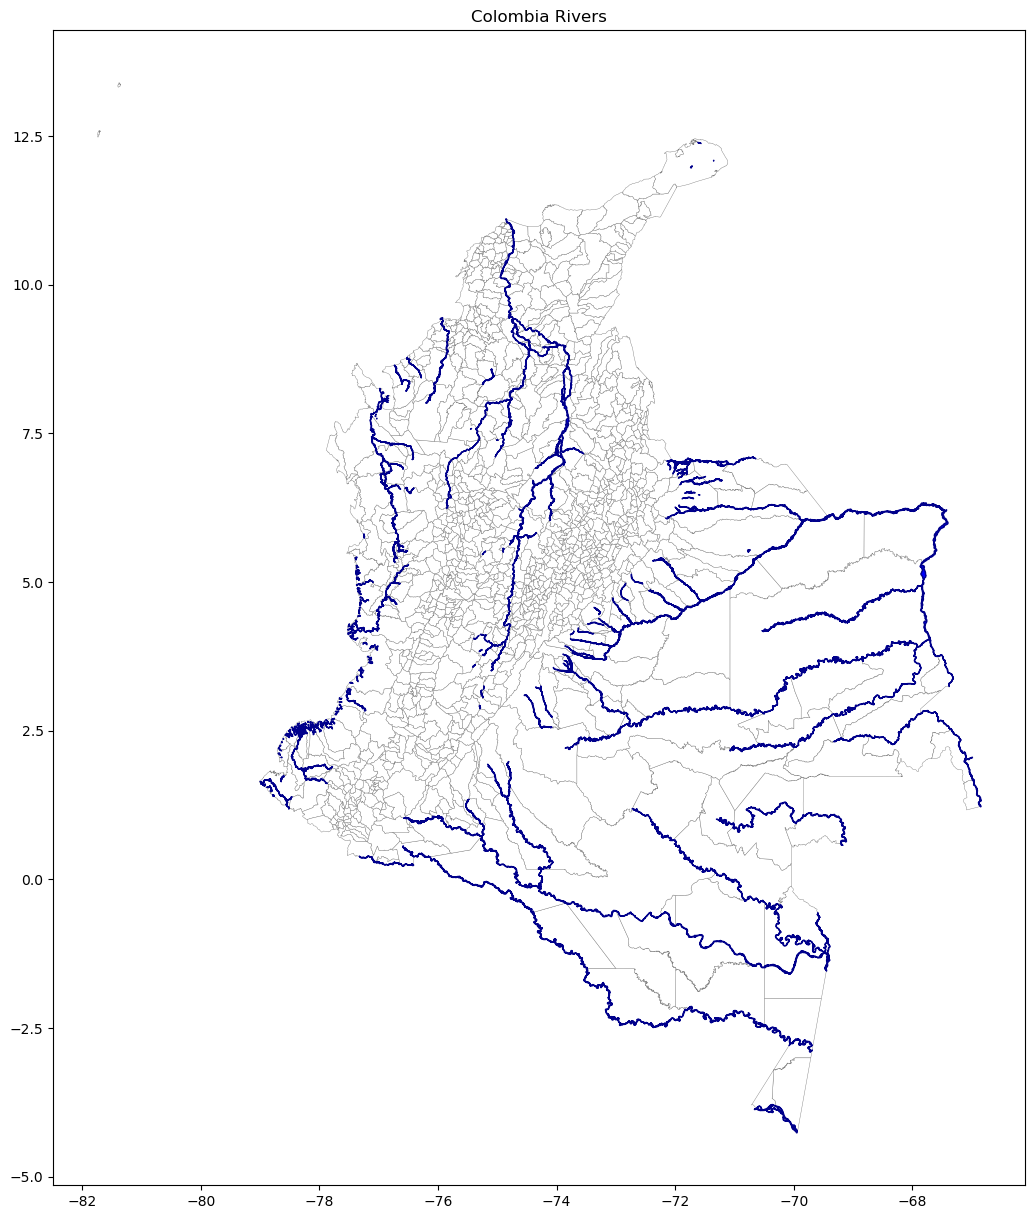

In [15]:
# Plot the rivers data using .plot()
fig,ax = plt.subplots(figsize = (30,15))

col_bound_gdf.plot(ax = ax, edgecolor = 'gray', color = 'white', linewidth = 0.3)

rivers_gdf.plot (ax = ax, edgecolor = 'darkblue', color = 'blue')

plt.title('Colombia Rivers')
plt.show()

## **Roads**

In [16]:
# Open Columbia roads (850,000 entries!)
roads_url = ("https://maps.princeton.edu/download/file/tufts-colombia-roads-11-shapefile.zip")

roads_gdf = gpd.read_file(roads_url)
roads_gdf.head()

,tipo_via,estado_sup,numero_car,accesibili,nombre_geo,clas_tipov,esc_vis,type,geometry
0,6.0,Sin Valor,Sin Valor,Sin Valor,NaN,6,0.0,3,"LINESTRING (-70.48271 4.24664, -70.48295 4.245..."
1,6.0,Sin Valor,Sin Valor,Sin Valor,NaN,6,0.0,3,"LINESTRING (-70.50524 4.26742, -70.50498 4.267..."
2,6.0,Sin Valor,Sin Valor,Sin Valor,NaN,6,0.0,3,"LINESTRING (-70.19799 4.24444, -70.19862 4.243..."
3,5.0,3306,3502,3601,NaN,5,0.0,3,"LINESTRING (-67.45190 3.51188, -67.45173 3.513..."
4,1.0,3301,3501,3600,NaN,1,17000000.0,1,"LINESTRING (-76.01828 1.87813, -76.00653 1.880..."


In [17]:
# Explore data using .info()
roads_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11400 entries, 0 to 11399
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   tipo_via    11400 non-null  float64 
 1   estado_sup  11400 non-null  object  
 2   numero_car  11400 non-null  object  
 3   accesibili  11400 non-null  object  
 4   nombre_geo  11 non-null     object  
 5   clas_tipov  11202 non-null  object  
 6   esc_vis     11400 non-null  float64 
 7   type        11400 non-null  int64   
 8   geometry    11400 non-null  geometry
dtypes: float64(2), geometry(1), int64(1), object(5)
memory usage: 801.7+ KB


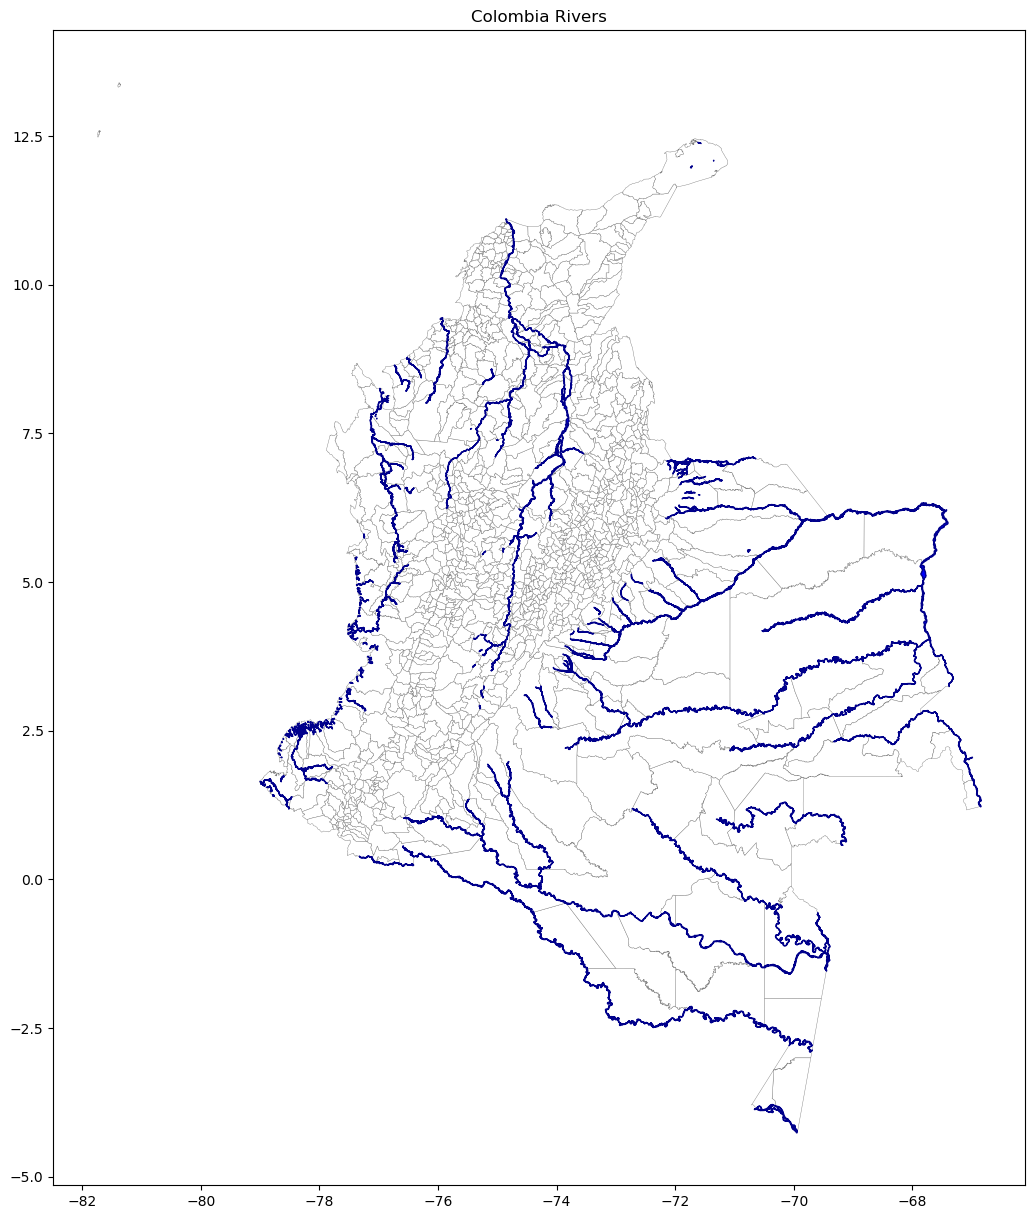

In [18]:
# Plot the rivers data using .plot()
fig,ax = plt.subplots(figsize = (30,15))

col_bound_gdf.plot(ax = ax, edgecolor = 'gray', color = 'white', linewidth = 0.3)

rivers_gdf.plot (ax = ax, edgecolor = 'darkblue', color = 'blue')

plt.title('Colombia Rivers')
plt.show()

## **Airports**

In [22]:
# Download Airports data
col_airports_url = "https://maps.princeton.edu/download/file/tufts-colombia-mainairports-14-shapefile.zip"

# Open airports data using geopandas
col_airports_gdf = gpd.read_file(col_airports_url)

In [23]:
# Determine number of airport types per admin designation using pd.crosstab()
cross_tab = pd.crosstab(col_airports_gdf["tipo"], col_airports_gdf["administra"])
cross_tab

administra,AEROCIVIL,ANI
tipo,,
INTERNACIONAL,2,11
MILITAR,7,0
NACIONAL,7,10
NACIONAL - REGIONAL,33,1
REGIONAL,1,0
REGIONAL - NO PASAJEROS,16,1


/opt/conda/lib/python3.10/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


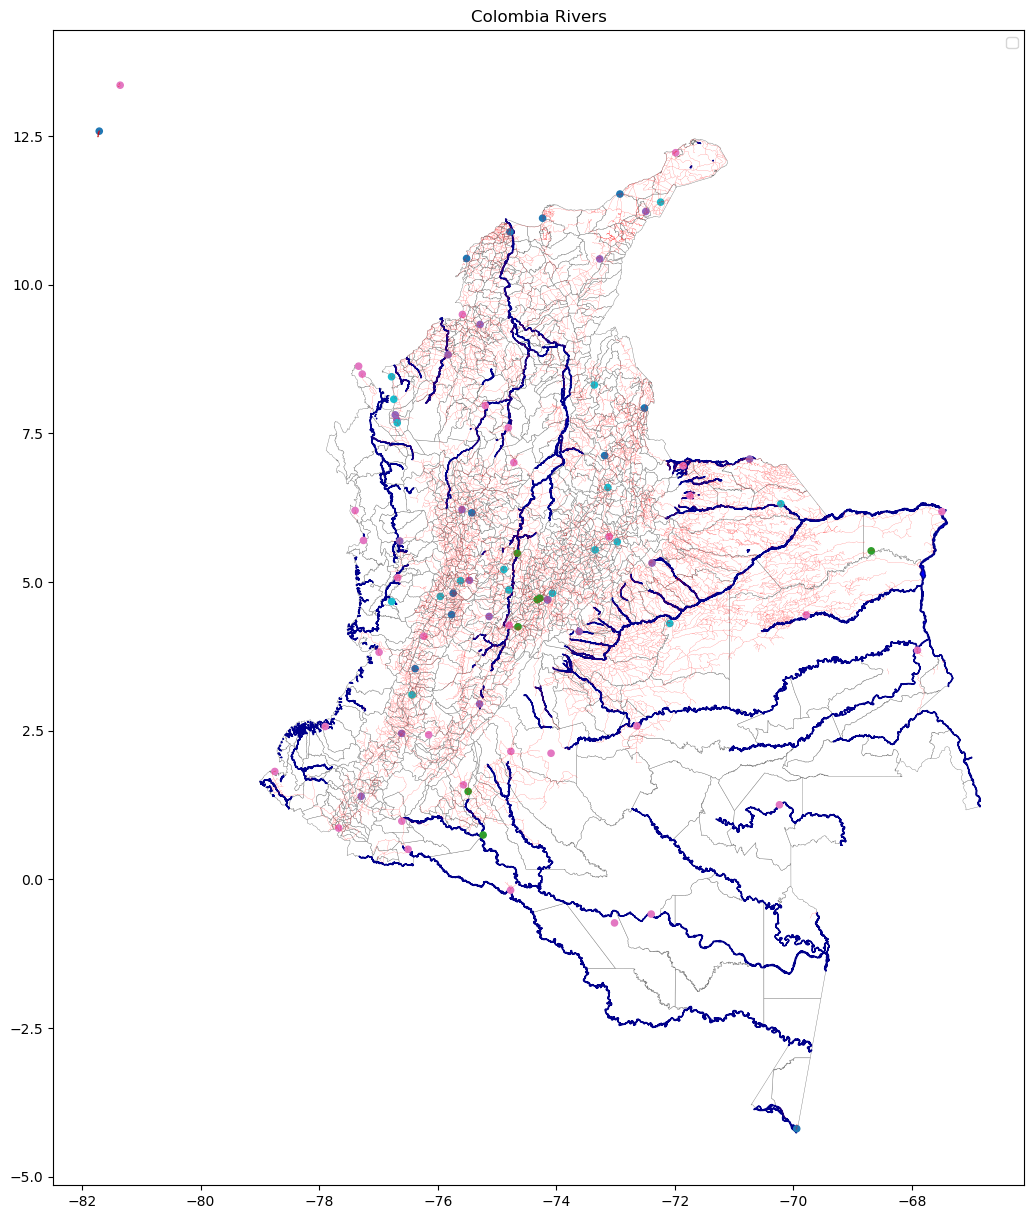

In [33]:
# Plot the airports data using .plot()
fig,ax = plt.subplots(figsize = (30,15))

col_bound_gdf.plot(ax = ax, edgecolor = 'gray', color = 'white', linewidth = 0.3)
rivers_gdf.plot (ax = ax, edgecolor = 'darkblue', color = 'blue')
roads_gdf.plot (ax = ax, color = 'red', linewidth = 0.1 )
#col_airports_gdf.plot (ax = ax, color = 'magenta', markersize = 20)
col_airports_gdf.plot (ax = ax, markersize = 20, column = 'tipo')

plt.title('Colombia Rivers')
plt.legend()
plt.show()

In [ ]:
# Looking at airport data as csv (pandas df) [from the previous notebook]
col_airports_df = pd.read_csv("https://ourairports.com/countries/CO/airports.csv")
col_airports_df

In [ ]:
# Create geodataframe from pandas df


# Convert to shp


# Call the 'new' col_airports_gdf2


In [ ]:
# Select only international, military and national airports from col_airports_gdf


In [ ]:
# Create map of Colombia boundaries, rivers, airports, and roads on the same axis using Matplotlib


In [ ]:
# Conservation Areas
conservation_url = "https://maps.princeton.edu/download/file/tufts-colombia-prioritizedenvconsareas-12-shapefile.zip"

conservation_gdf = gpd.read_file(conservation_url)
conservation_gdf

In [ ]:
# Forest areas
forest_url = "https://maps.princeton.edu/download/file/tufts-colombia-forest-reserves-12-shapefile.zip"

forest_gdf = gpd.read_file(forest_url)
forest_gdf

In [ ]:
# Plot the conservation areas using .plot() and color by 'PRIORIDAD'


In [ ]:
# Plot Colombia boundaries and forested areas colored by 'nombre_zrf' on same axis using Matplotlib


In [ ]:
# Mining Areas
mining_url = "https://maps.princeton.edu/download/file/tufts-colombia-miningprojects-13-shapefile.zip"
mining_gdf = gpd.read_file(mining_url)
mining_gdf.plot()

In [ ]:
# Petroleum / Gas exploration 2014 - *Polygon
gas_2014_url = "https://maps.princeton.edu/download/file/tufts-colombia-petroleumgasexplorationareas-14-shapefile.zip"

# Open data using geopandas and plot using .plot() color by 'SOLICITANT'


In [ ]:
# Plot the oil and gas (2014) polygon on the Colombia boundary using Matplotlib


## **Focusing on one Department (Cauca)**


*   Select Department
*   Clip roads, rivers, airports to Cauca
*   Plot all layers on common axis




In [41]:
# Select Cauca (Deptarmento)
oil2013_cauca_gdf = oil2013_col_gdf[oil2013_col_gdf['DEPTO'] == 'CAUCA']
oil2013_cauca_gdf

,CORPORACIO,DEPTO,ESTADO,EXP,FECHA,MUNIC,PROYECTO,REGION,RESOLUCION,SOLICITANT,geometry
865,CORPOAMAZONIA,CAUCA,SEGUIMIENTO,LAM0042,18/05/1995,PIAMONTE,POZO DE DESARROLLO TOROYACO-4,AMAZONIA,472.0,GRAN TIERRA ENERGY COLOMBIA,POINT (-76.30377 0.99311)


In [42]:
dep_bound_gdf_cauca = dep_bound_gdf[dep_bound_gdf['NAME_1'] =='Cauca']
dep_bound_gdf_cauca

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
406,53,COL,Colombia,11,Cauca,407,Almaguer,CO.CA.AL,0,NaN,Municipio,Municipality,NaN,NaN,"POLYGON ((-76.91900 1.79490, -76.92480 1.80130..."
407,53,COL,Colombia,11,Cauca,408,Argelia,CO.CA.AG,0,NaN,Municipio,Municipality,NaN,NaN,"POLYGON ((-77.40909 2.21342, -77.40870 2.21860..."
408,53,COL,Colombia,11,Cauca,409,Balboa,CO.CA.BA,0,NaN,Municipio,Municipality,NaN,NaN,"POLYGON ((-77.24387 1.96429, -77.24660 1.96730..."
409,53,COL,Colombia,11,Cauca,410,Bolívar,CO.CA.BO,0,NaN,Municipio,Municipality,NaN,NaN,"POLYGON ((-76.91090 1.63080, -76.91490 1.63320..."
410,53,COL,Colombia,11,Cauca,411,Buenos Aires,CO.CA.BA,0,NaN,Municipio,Municipality,NaN,NaN,"POLYGON ((-76.63720 2.87270, -76.64530 2.87740..."
411,53,COL,Colombia,11,Cauca,412,Cajibío,CO.CA.CJ,0,NaN,Municipio,Municipality,NaN,NaN,"POLYGON ((-76.92880 2.75840, -76.92130 2.75490..."
412,53,COL,Colombia,11,Cauca,413,Caldonó,CO.CA.CD,0,NaN,Municipio,Municipality,NaN,NaN,"POLYGON ((-76.39680 2.77990, -76.40940 2.78050..."
413,53,COL,Colombia,11,Cauca,414,Caloto,CO.CA.CT,0,NaN,Municipio,Municipality,NaN,NaN,"POLYGON ((-76.29110 3.08990, -76.29370 3.08730..."
414,53,COL,Colombia,11,Cauca,415,Corinto,CO.CA.CO,0,NaN,Municipio,Municipality,NaN,NaN,"POLYGON ((-76.09200 3.05930, -76.09950 3.05710..."
415,53,COL,Colombia,11,Cauca,416,El Tambo,CO.CA.ET,0,NaN,Municipio,Municipality,NaN,NaN,"POLYGON ((-76.80070 2.45290, -76.80530 2.44200..."


In [44]:
# Select Cauca
cauca = dep_bound_gdf[dep_bound_gdf["NAME_1"].isin(["Cauca"])]
cauca

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
406,53,COL,Colombia,11,Cauca,407,Almaguer,CO.CA.AL,0,NaN,Municipio,Municipality,NaN,NaN,"POLYGON ((-76.91900 1.79490, -76.92480 1.80130..."
407,53,COL,Colombia,11,Cauca,408,Argelia,CO.CA.AG,0,NaN,Municipio,Municipality,NaN,NaN,"POLYGON ((-77.40909 2.21342, -77.40870 2.21860..."
408,53,COL,Colombia,11,Cauca,409,Balboa,CO.CA.BA,0,NaN,Municipio,Municipality,NaN,NaN,"POLYGON ((-77.24387 1.96429, -77.24660 1.96730..."
409,53,COL,Colombia,11,Cauca,410,Bolívar,CO.CA.BO,0,NaN,Municipio,Municipality,NaN,NaN,"POLYGON ((-76.91090 1.63080, -76.91490 1.63320..."
410,53,COL,Colombia,11,Cauca,411,Buenos Aires,CO.CA.BA,0,NaN,Municipio,Municipality,NaN,NaN,"POLYGON ((-76.63720 2.87270, -76.64530 2.87740..."
411,53,COL,Colombia,11,Cauca,412,Cajibío,CO.CA.CJ,0,NaN,Municipio,Municipality,NaN,NaN,"POLYGON ((-76.92880 2.75840, -76.92130 2.75490..."
412,53,COL,Colombia,11,Cauca,413,Caldonó,CO.CA.CD,0,NaN,Municipio,Municipality,NaN,NaN,"POLYGON ((-76.39680 2.77990, -76.40940 2.78050..."
413,53,COL,Colombia,11,Cauca,414,Caloto,CO.CA.CT,0,NaN,Municipio,Municipality,NaN,NaN,"POLYGON ((-76.29110 3.08990, -76.29370 3.08730..."
414,53,COL,Colombia,11,Cauca,415,Corinto,CO.CA.CO,0,NaN,Municipio,Municipality,NaN,NaN,"POLYGON ((-76.09200 3.05930, -76.09950 3.05710..."
415,53,COL,Colombia,11,Cauca,416,El Tambo,CO.CA.ET,0,NaN,Municipio,Municipality,NaN,NaN,"POLYGON ((-76.80070 2.45290, -76.80530 2.44200..."


In [45]:
# Select Florencia (Municipio)
florencia = dep_bound_gdf_cauca[dep_bound_gdf_cauca["NAME_2"].isin(["Florencia"])]
florencia

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
416,53,COL,Colombia,11,Cauca,417,Florencia,CO.CA.FL,0,NaN,Municipio,Municipality,NaN,NaN,"POLYGON ((-77.07230 1.73840, -77.06600 1.72450..."


In [47]:
# Print the CRS for Cacua and the rivers_gdf data
florencia.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [48]:
# Reproject rivers_gdf to Cauca CRS (EPSG:4326)

rivers_EPSG4326 = rivers_gdf.to_crs('EPSG:4326')

<Axes: >

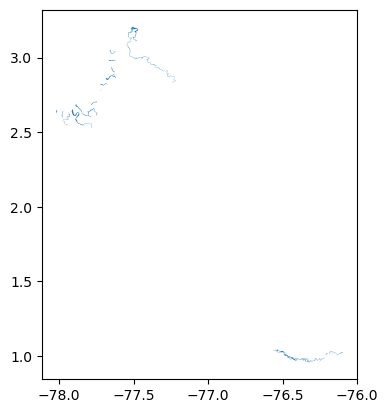

In [52]:
# Clip rivers to Cauca boundary using gpd.clip() and plot using .plot()
rivers_cauca = gpd.clip(rivers_EPSG4326, dep_bound_gdf_cauca )
rivers_cauca.plot()

<Axes: >

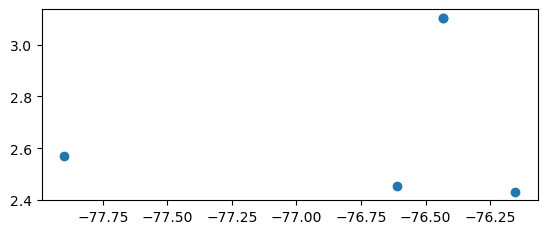

In [53]:
# Reproject col_airports_gdf to Cauca CRS
col_airports_gdf_EPSG4326 = col_airports_gdf.to_crs('EPSG:4326')

# Clip airports to Cauca boundary
airports_cauca = gpd.clip(col_airports_gdf_EPSG4326, dep_bound_gdf_cauca )

# Plot Cauca airports
airports_cauca.plot()

<Axes: >

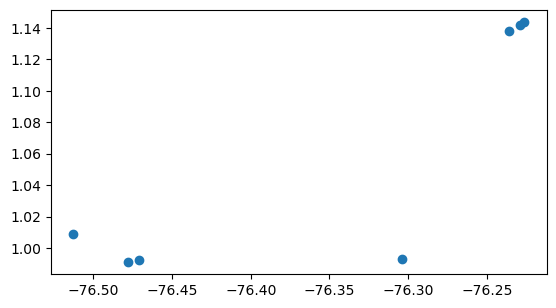

In [55]:
# Reproject oil/gas to Cauca CRS

oil2013_col_gdf_EPSG4326 = oil2013_col_gdf.to_crs('EPSG:4326')


# Clip oil & gas to Cauca
oil2013_cauca_gdf_EPSG4326 = gpd.clip(oil2013_col_gdf_EPSG4326, dep_bound_gdf_cauca )
oil2013_cauca_gdf_EPSG4326.plot()

<Axes: >

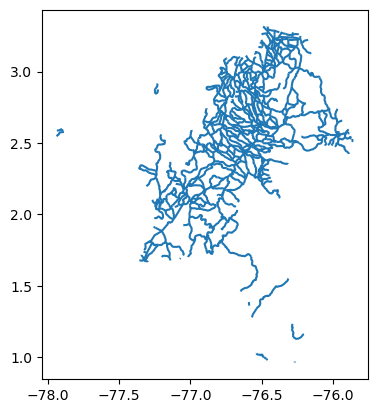

In [57]:
# Reproject roads to Cauca CRS

roads_gdf_EPSG4326 = roads_gdf.to_crs('EPSG:4326')

# Clip roads to Cauca
roads_cauca_gdf_EPSG4326 = gpd.clip(roads_gdf_EPSG4326, dep_bound_gdf_cauca)

roads_cauca_gdf_EPSG4326.plot()

/opt/conda/lib/python3.10/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/opt/conda/lib/python3.10/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


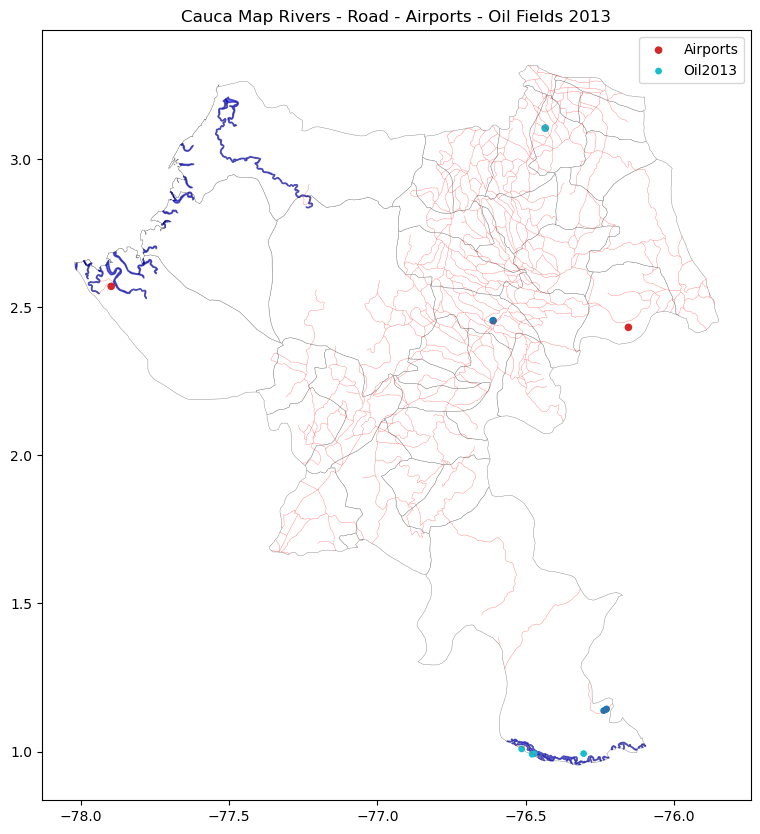

In [73]:
# Plot roads, rivers, oil & gas within Cauca using Matplotlib
fig, ax = plt.subplots(figsize=(10,10))


cauca.plot(ax = ax, edgecolor = 'gray', color = 'white', linewidth = 0.3)
rivers_cauca.plot (ax = ax, edgecolor = 'darkblue', color = 'blue', alpha = 0.6)
roads_cauca_gdf_EPSG4326.plot (ax = ax, color = 'red', linewidth = 0.3,  alpha = 0.5 )

airports_cauca.plot (ax = ax, markersize = 20, column = 'tipo', label = 'Airports')

#oil2013_cauca_gdf_EPSG4326.plot(ax = ax, marker = '^')
oil2013_cauca_gdf_EPSG4326.plot(ax = ax, markersize = 15, column = 'FECHA', label = 'Oil2013')
plt.title('Cauca Map Rivers - Road - Airports - Oil Fields 2013')
#plt.legend()

ax.legend()

plt.show()


/opt/conda/lib/python3.10/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/opt/conda/lib/python3.10/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


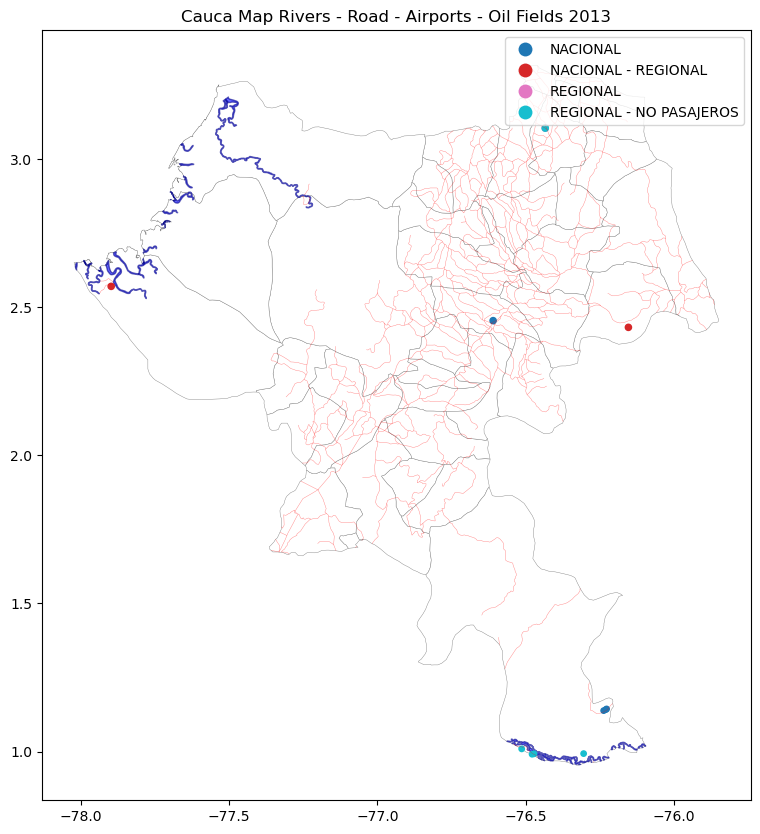

In [75]:
# Plot roads, rivers, oil & gas within Cauca using Matplotlib
fig, ax = plt.subplots(figsize=(10,10))


cauca.plot(ax = ax, edgecolor = 'gray', color = 'white', linewidth = 0.3)
rivers_cauca.plot (ax = ax, edgecolor = 'darkblue', color = 'blue', alpha = 0.6)
roads_cauca_gdf_EPSG4326.plot (ax = ax, color = 'red', linewidth = 0.3,  alpha = 0.5 )

airports_cauca.plot (ax = ax, markersize = 20, column = 'tipo', legend = True)

#oil2013_cauca_gdf_EPSG4326.plot(ax = ax, marker = '^')
oil2013_cauca_gdf_EPSG4326.plot(ax = ax, markersize = 15, column = 'FECHA')
plt.title('Cauca Map Rivers - Road - Airports - Oil Fields 2013')
#plt.legend()

#ax.legend()

plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(40,20))

# Plotting each element with labels
road_cauca.plot(ax=ax, color="brown", linewidth=0.5, label='Roads')
oil_cauca.plot(ax=ax, color="green", marker='.', markersize=30, label='Oil Fields')
dept_gdf_cauca.plot(ax=ax, color="white", edgecolor="black", linewidth=0.5, alpha=0.5, label='Departments')
airports_cauca.plot(ax=ax, marker='x', color="black", markersize=50, label='Airports')
rivers_cauca.plot(ax=ax, color="blue", linewidth=4, label='Rivers')

# Adding legend
ax.legend()

plt.title("Rivers - CAUCA Roads")

plt.show()

## **Focus on one municipality (Puetro Asis)**


In [ ]:
# Zoom in on PUERTO ASÍS

# Extract PUERTO ASÍS from Putumayo boundary


# Clip oil gas points 2013 to PUERTO ASÍS boundary


# Clip rivers to PUERTO ASÍS boundary


# Clip roads to PUERTO ASÍS boundary


# Clip airports to PUERTO ASÍS boundary


# Clip gas/oil polygon 2014 to PUERTO ASÍS boundary


# Plot Puerto Asis boundary and clipped oil and gas


# Define and place legend



## **Interactive Maps with Folium**

In [76]:
# Create an interactive map of airports using folium

import folium

#Define coordinates of where we want to center our map
map_center_coords = [5.0, -72.0]

#Create the map
my_map = folium.Map(location = map_center_coords, zoom_start = 6)

# for lat,long in zip(bigger_air_and_heli.geometry.y, bigger_air_and_heli.geometry.x):
#     folium.Marker(
#         location=[lat, long],
#         #popup=['name']
#     ).add_to(my_map)

for _, airport_info in inter_mil_nat.iterrows():
    folium.Marker(
        location=[airport_info.geometry.y, airport_info.geometry.x],
        popup=airport_info['nombre']
    ).add_to(my_map)

my_map

NameError: name 'inter_mil_nat' is not defined

## **Looking at Geology Data** (hosted on CyVerse)

In [77]:
# Open Geology of S America gdf

geology_url = (
    "https://data.cyverse.org/dav-anon/iplant/home/shared/"
    "earthlab/geopark/geo6ag.zip")

geology_gdf = gpd.read_file(geology_url)
geology_gdf

,AREA,PERIMETER,GEO6AG_,GEO6AG_ID,GLG,geometry
0,0.040,0.855,2,1,Q,"POLYGON ((-59.66749 13.29528, -59.66698 13.312..."
1,0.056,1.279,3,2,T,"POLYGON ((-71.50227 12.30068, -71.50932 12.307..."
2,0.131,2.377,4,3,T,"POLYGON ((-71.50227 12.30068, -71.52989 12.273..."
3,0.036,1.236,5,4,Q,"POLYGON ((-71.44106 12.28247, -71.44624 12.277..."
4,0.026,0.919,6,4988,T,"POLYGON ((-71.19487 12.24533, -71.18432 12.235..."
...,...,...,...,...,...,...
4955,0.011,0.772,4957,0,MCi,"POLYGON ((-67.56933 -55.71361, -67.55640 -55.7..."
4956,0.016,0.970,4958,0,MCi,"POLYGON ((-67.61195 -55.90223, -67.62279 -55.9..."
4957,0.007,0.403,4959,5036,MCi,"POLYGON ((-67.28674 -55.87095, -67.28998 -55.8..."
4958,0.003,0.259,4960,5037,MCi,"POLYGON ((-67.20068 -55.85864, -67.19444 -55.8..."


In [78]:
# Clip S America geology to Colombia boundary

geog_clipped = geology_gdf.clip(dep_bound_gdf_cauca.geometry)
geog_clipped

,AREA,PERIMETER,GEO6AG_,GEO6AG_ID,GLG,geometry
676,0.862,6.922,678,0,pC,"POLYGON ((-76.29891 0.97355, -76.30227 0.97686..."
729,2.972,25.179,731,746,Cv,"MULTIPOLYGON (((-76.76378 1.60376, -76.76045 1..."
750,0.425,6.649,752,770,K,"POLYGON ((-76.49622 1.08569, -76.49953 1.08234..."
754,0.056,1.005,756,774,K,"POLYGON ((-76.30231 0.98354, -76.30227 0.97686..."
734,0.103,2.566,736,752,PMi,"POLYGON ((-76.25273 1.51120, -76.24942 1.51457..."
513,2.224,35.425,515,559,Mv,"MULTIPOLYGON (((-76.40917 3.28274, -76.40908 3..."
706,0.285,4.525,708,0,pC,"MULTIPOLYGON (((-76.25941 1.51115, -76.26603 1..."
698,0.561,4.894,700,715,T,"MULTIPOLYGON (((-76.15635 1.09449, -76.16629 1..."
678,0.364,5.189,680,693,T,"POLYGON ((-77.19329 2.88039, -77.19658 2.87700..."
696,0.306,3.226,698,713,Cv,"MULTIPOLYGON (((-76.40032 1.60356, -76.40029 1..."


/opt/conda/lib/python3.10/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


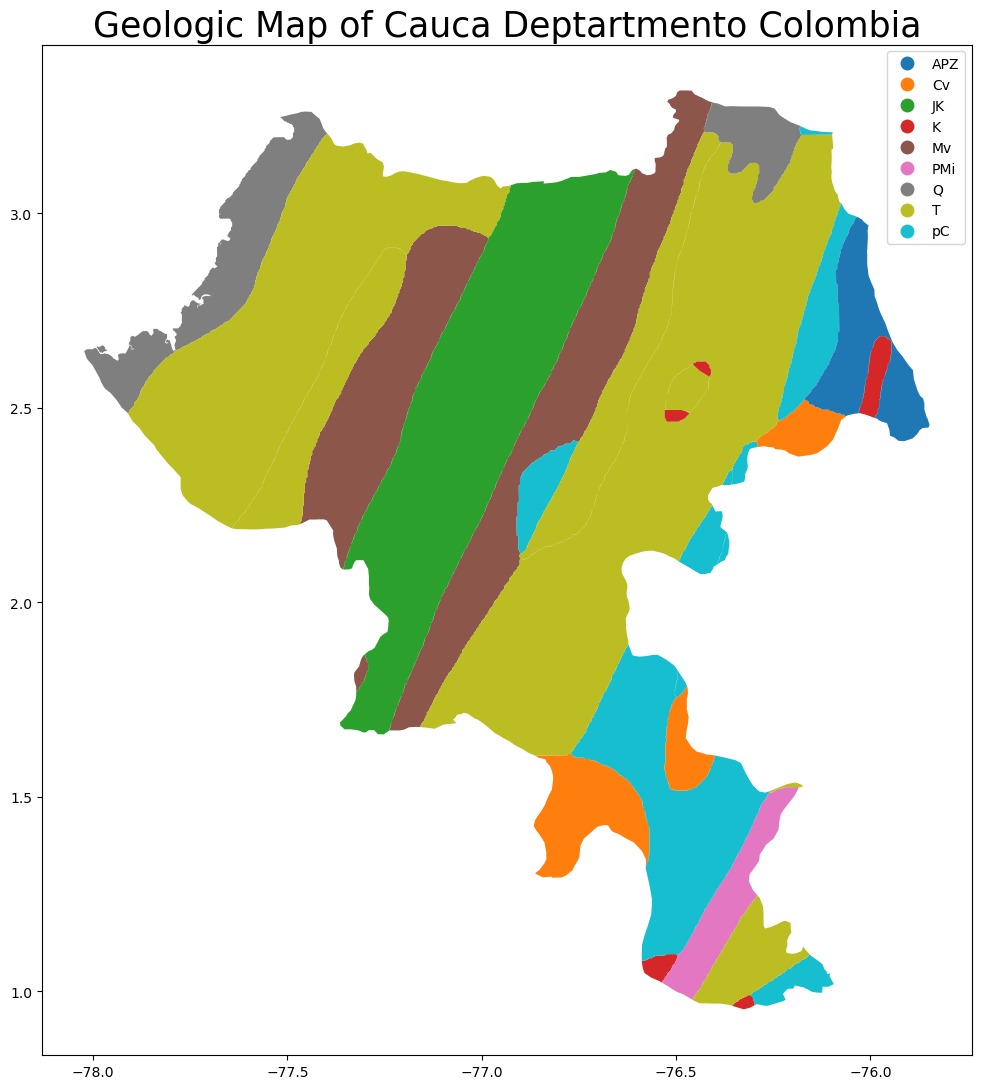

In [79]:
# Plot clipped geology
fig, ax = plt.subplots(figsize=(12,20))
geog_clipped.plot(ax=ax,
                  column='GLG',
                  legend=True)
plt.title("Geologic Map of Cauca Deptartmento Colombia", fontsize=25)
plt.show()